<a href="https://colab.research.google.com/github/codewithshahg/PIAIC_LANCHAIN_PROJECT_1/blob/main/langchain_project_no_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GOOGLE_API_KEY')

In [ ]:
!pip install langchain_google_genai

In [ ]:
!pip install openai langchain


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.tools import tool
import openai
from langchain.prompts import PromptTemplate

In [ ]:
first_prompt = PromptTemplate (
    input_variables = ["question"],
    template = "change this {question} into  a good image generative promt  ?"
)

Second_promt = PromptTemplate (
    input_variables = ["first_response"],
    template = "read this {first_response}   and summarize into two lines promt for image generation ?"
)




In [ ]:
llm =  ChatGoogleGenerativeAI(
    api_key = GEMINI_API_KEY,
    model = "gemini-1.5-flash",
    temperature = 0.5,
    max_output_tokens = 75,
)

In [ ]:
first_chain = first_prompt | llm
second_chain = Second_promt | llm



In [ ]:

from diffusers import StableDiffusionPipeline
import torch

In [ ]:
first_response = first_chain.invoke({"question" : input("write a image generation prompt ")})
print("First chain   " , first_response.content)


Second_response = second_chain.invoke({"first_response" : first_response.content})
print("Second chain   " , Second_response.content)


# Pass the refined prompt to the Stable Diffusion pipeline
print("\nGenerating the image...")

# Load the Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

# Use GPU if available
if torch.cuda.is_available():
    pipe.to("cuda")

# Generate the image using the refined prompt
image = pipe(first_response.content).images[0]

# Save the generated image
image.save("refined_generated_image.png")
print("Image generated and saved as 'refined_generated_image.png'")

write a image generation prompt image a persian  cat
First chain    To generate a good image prompt for a Persian cat, we need more information about the desired image.  A simple prompt like "Persian cat" will give variable results.  To get a specific image, be more descriptive.  Here are some examples, ranging from simple to complex:

**Simple Prompts:**

* "A fluffy Persian cat, blue eyes, sitting
Second chain    Fluffy Persian cat with blue eyes, sitting.  High-detail, photorealistic.

Generating the image...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image generated and saved as 'refined_generated_image.png'


<class 'langchain_core.messages.ai.AIMessage'>


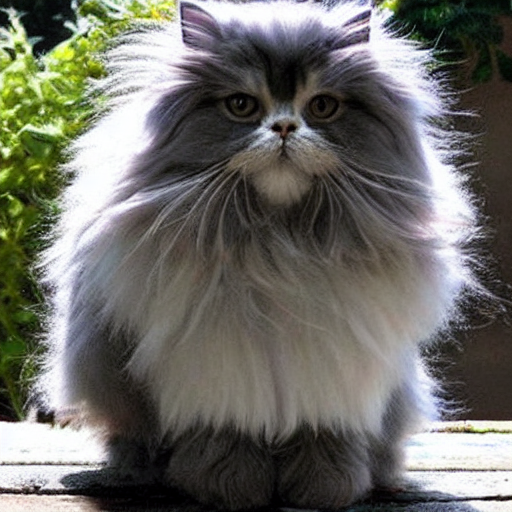

In [ ]:
print(type(first_response))
image